# Data Analysis 

---

This dataset has different aspects of internal flight information of India.

Here we try to finding insight. As example:
* we will look at the reasons for the increase in air ticket prices. 
* Best-selling route ticket 
* Segmentation according to the airlines.
* Widely used route & its causes.
* some more confidential insight


In [1]:
# Import the necessary modules
!pip install openpyxl==3.0.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
# dataset is in form of excel file in github
# so link will be added by '?raw=true'
url = 'https://github.com/mdimran1/Dataset/blob/main/Flight%20Fare/Data_Train.xlsx?raw=true'
data = pd.read_excel(url)

# set fow all column display
pd.set_option('display.max_columns', None)

In [3]:
## See the top and last ten rows of data

data.head(-10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10670,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10671,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100


**Details of various features of the data set**

---
**Airline** : This column mentions the names of the companies of different airlines and it is a categorical feature.
<br>**Date_of_Journey** : The date of the trip is mentioned here.
<br>**Source** : Indicates the station from which the plane departed.
<br>**Destination** : The destination of the aircraft is specified.
<br>**R **bold text**oute** : Information is available on which routes the aircraft will operate.
<br>**Dep_Time** : Mentioned at the start of the journey.
<br>**Arrival_Time** :  The time of arrival at the destination is specified.
<br>**Duration** : Total travel time is specified in hours and minutes.
<br>**Total_Stops** : How many times has the plane taken a break on the way.
<br>**Additional_Info** : Other benefits such as whether food, Seat Class is mentioned in this column.
<br>**Price** : Flight ticket prices are mentioned

## Data Cleaning:

In [4]:
# Checking if any data is missing or Null:
data.isnull().sum()


# Note : Root and total_stops are missing 1 record
# We might delete this null records 

data.dropna(axis=0, inplace=True)

In [5]:
# Checking data Type and info:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [6]:
## Date_of_Journey,	Dep_Time,	Arrival_Time,	Duration 
# These features were supposed to be in 'datetime64' format but are not
# lets reformating this:

data['Date_of_Journey']= pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y")

# Dep_Time in times of the day format
data['Dep_Time'] = pd.cut(pd.to_datetime(data.Dep_Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
       right=False,
       include_lowest=True)


# Arrival_Time in times of the day format
data['Arrival_Time'] = pd.cut(pd.to_datetime(data.Arrival_Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
       right=False,
       include_lowest=True)


**Route and Total_stops are revealing the same information.**
<br> **We drop Route columns**
<br> **As a total_stops is in  object, we mighttransform  this into numerical**

In [7]:
# checking total values count :
data.Total_Stops.value_counts()
data.Total_Stops.unique()

# replacing values as dict for Total_stops :
values = {'non-stop':0, '2 stops': 2, '1 stop':1, '3 stops':3, '4 stops':4}
#replacing:
data['Total_Stops'].replace(values,inplace=True)
#droping Route :
del data['Route']

**In Duration column Some information is given in Hour and Minutes and some information is given only in hours or only in minutes<br>So we will do Transforming**

In [8]:
data.Duration.unique() #checking elements

# Transforming 'Duration' feature:
lengh = len(data['Duration'])
duration = list(data['Duration'])
for index in range(lengh):
  if 'h' in duration[index] and 'm' not in duration[index]:
    duration[index] = duration[index] + ' 0m'
  elif 'h' not in duration[index] and 'm' in duration[index]:
    duration[index] = '0h ' + duration[index] 
  else:
    pass

# reassinging 'Duration' column :
data['Duration'] = duration

# Now we extract duration in minutes from Duration column :
data['Duration_minutes'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60)

In [9]:
data['Destination'].unique()
# In Destination feature contains both New Delhi & Delhi, literaly its same
# we might transform in one element as Delhi
data['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)


## Feature Extraction

In [10]:
# extracting days of week and month from Date_of_Journey
data['Dep_Month'] = data.Date_of_Journey.dt.month_name() # months
data['Dep_Day'] = data.Date_of_Journey.dt.day_name() # days of week

In [11]:
data.Additional_Info.value_counts(normalize=True)
# Additional_Info is about 78% records has 'no info'
# we might drop 

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [12]:
# droping unnecessery column
data.drop(labels=['Duration', 'Date_of_Journey','Additional_Info'], axis=1, inplace=True)

In [13]:
data.head()
#### data is ready for further analysis

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_minutes,Dep_Month,Dep_Day
0,IndiGo,Banglore,Delhi,Evening,Night,0,3897,170,March,Sunday
1,Air India,Kolkata,Banglore,Night,Afternoon,2,7662,445,May,Wednesday
2,Jet Airways,Delhi,Cochin,Morning,Night,2,13882,1140,June,Sunday
3,IndiGo,Kolkata,Banglore,Evening,Evening,1,6218,325,May,Sunday
4,IndiGo,Banglore,Delhi,Afternoon,Evening,1,13302,285,March,Friday


## Exploratory Analysis and visualization :

---
we might do data analysis for or finding inside and hidden pattern. Some information will be noted below and visualizations are given below. 

**Percentage of Metrix in dataset :**

1. Jet Airways handled 36% of the total travel, That's the decent thing that they do. **(fig - 1)**
2. About half of the journey starts from Delhi. Kolkata & Banglore can be a potential source of travel. **(fig - 2)**

3. Most of the Flights started In morning shift. Morning shift is a sparkling point for Air Flight in India. **(Fig-3)**
4. Nearly half of the journeys are conducted by One Stop Flight and the second most frequent flight is Non-stop or direct Flight. **(fig-5)**
5. It is seen that most Flights are conducted in May and June. **(Fig-4)**
6. From Chennai only one flights left for Kolkata. <br> Travel to Kolkata has Only non-stop Flights. Besides, the proportion of non-stop Flights is higher in Delhi and Hyderabad **("Figure-8)** <br> Chennai has only Non-Stop flight **(fig-9)**


<br>**Insight that contributes to Price :**

1. Among other airlines 'Jet Airways Business' has more valuable price range. **(fig-6)**
2. Most valuable price paid for Source as "Delhi". <br>Ticket prices are highest on all flights departing from Delhi. And the lowest is 'Chennai'. **(Fig-7)**
<br> 


In [14]:
# The summary of each column and the percentage of its own attributes

# for column in data.columns:
#   print(data[[column]].value_counts(normalize=True).reset_index())
#   print('='*50)

In [15]:
#  finding percentage of airlines operation 
percnt_air = data[['Airline']].value_counts(normalize=True).mul(100)
pd.DataFrame(percnt_air,columns=['Percentage']).reset_index()


,Airline,Percentage
0,Jet Airways,36.032578
1,IndiGo,19.219247
2,Air India,16.392061
3,Multiple carriers,11.196405
4,SpiceJet,7.657742
5,Vistara,4.484179
6,Air Asia,2.986332
7,GoAir,1.816139
8,Multiple carriers Premium economy,0.121700
9,Jet Airways Business,0.056169


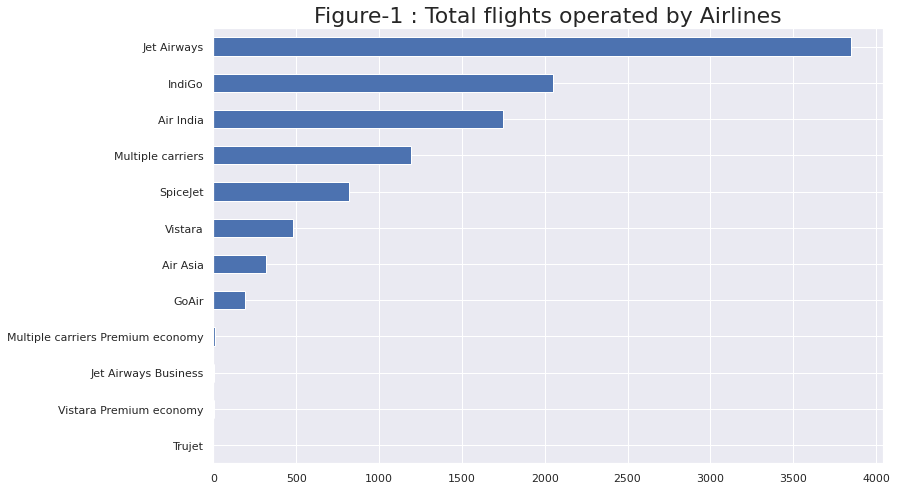

In [16]:
# Visualizatio of total number of flight by airline: 

plt.figure(figsize=(12,8))
data['Airline'].value_counts(ascending=True).plot(kind='barh')
plt.title('Figure-1 : Total flights operated by Airlines',fontdict = {'fontsize' : 22})
plt.show()

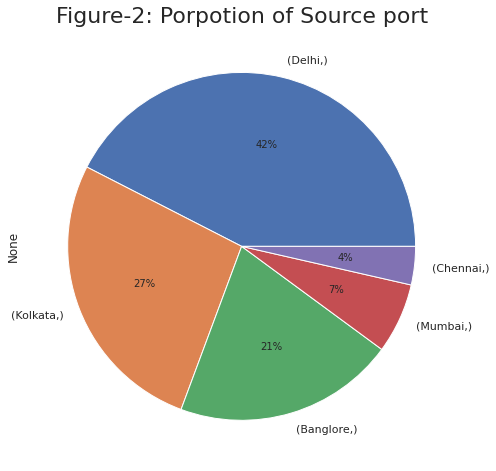

In [17]:
# Note : About half of the journey starts from Delhi. Kolkata can be a potential source of travel.

percent_source = data[['Source']].value_counts()

plt.figure(figsize=(8,8))
percent_source.plot(kind='pie',autopct='%.00f%%')
plt.title('Figure-2: Porpotion of Source port', fontsize=22)
plt.show()

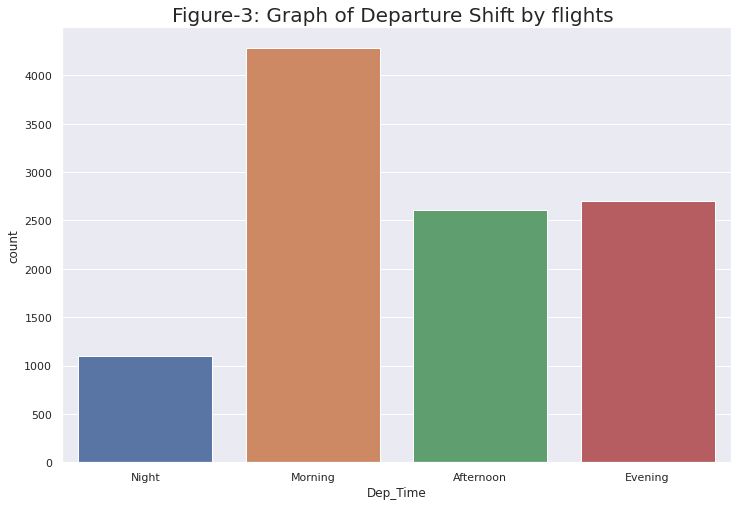

In [18]:
# Most of the Flights started In morning shift
plt.figure(figsize=(12,8))
sns.countplot(x='Dep_Time', data=data)
plt.title('Figure-3: Graph of Departure Shift by flights ', fontsize=20)
plt.show()

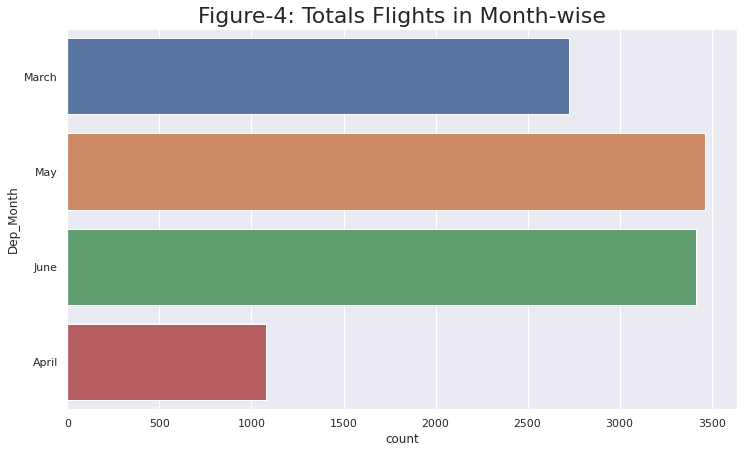

In [19]:
# ploting flight by months

plt.figure(figsize=(12,7))
sns.countplot(y='Dep_Month', data=data)
plt.title('Figure-4: Totals Flights in Month-wise',fontsize=22)
plt.show()

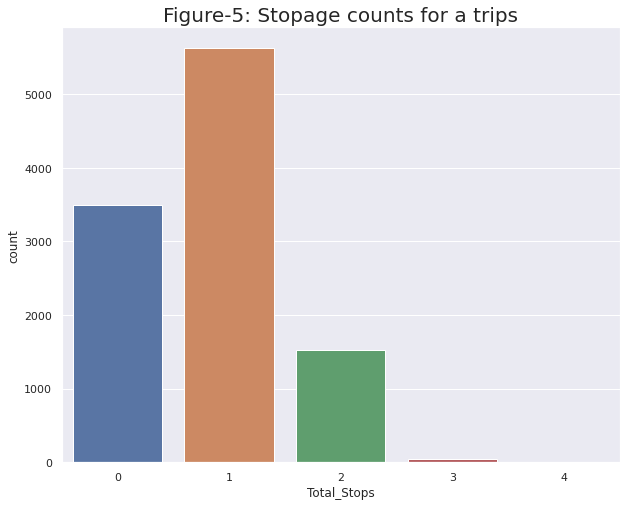

In [20]:
# ploting stopage 
plt.figure(figsize=(10,8))
sns.countplot(x='Total_Stops', data=data )
plt.title('Figure-5: Stopage counts for a trips', fontsize='20')
plt.show()

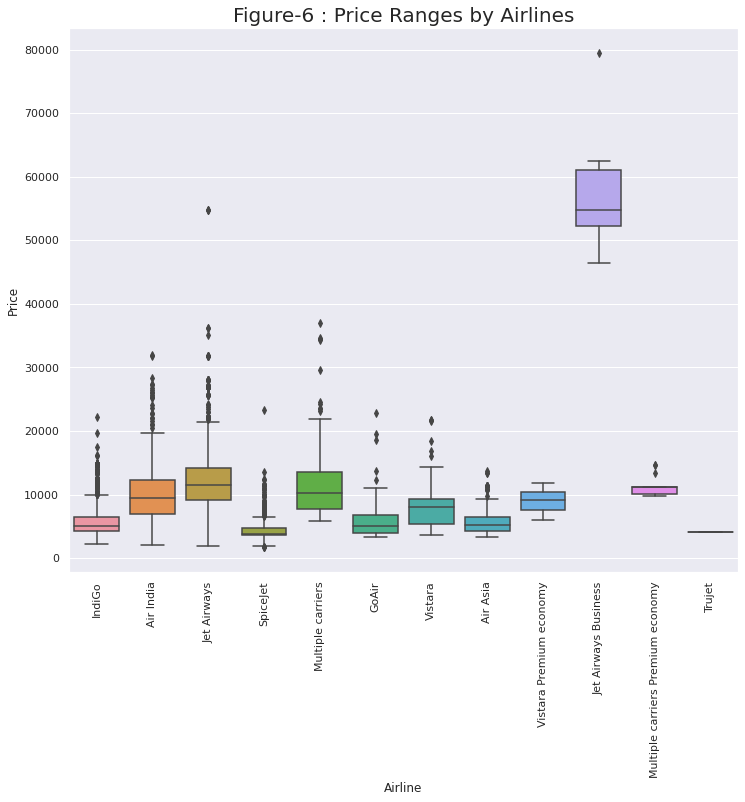

In [21]:
# 'Jet Airways Business' has more valuable price range
plt.figure(figsize=(12,10))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Figure-6 : Price Ranges by Airlines", fontsize='20')
plt.show()

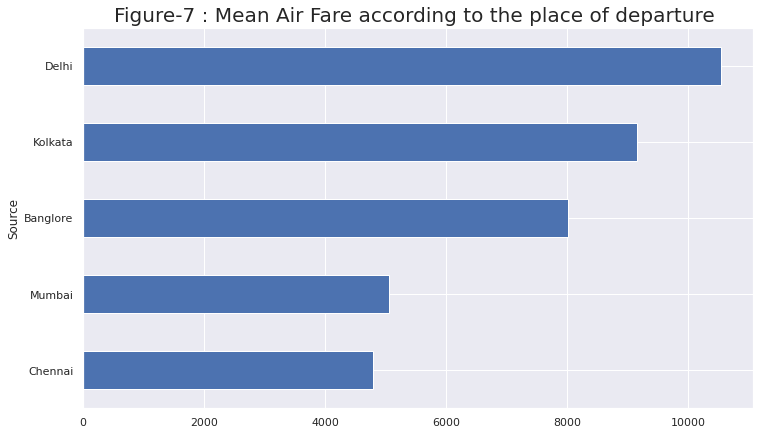

In [22]:
#  Air fare median from departure wise


plt.figure(figsize=(12,7))
(data.groupby(['Source'])['Price'].mean()
.sort_values(ascending=True)
.plot(kind='barh')
)
plt.title("Figure-7 : Mean Air Fare according to the place of departure ", fontsize='20')
plt.show()

Text(0.5, 1.0, 'Figure-8 : Total Stopage diagram according to the Destination')

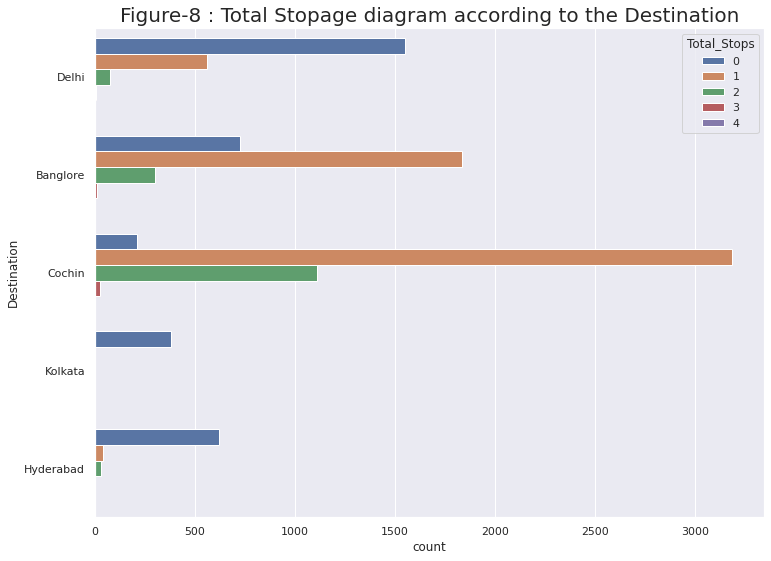

In [23]:
data.groupby(['Destination','Total_Stops']).count()

plt.figure(figsize=(12,9))
sns.countplot(y='Destination',data=data,hue='Total_Stops')
plt.title("Figure-8 : Total Stopage diagram according to the Destination", fontsize='20')

Text(0.5, 1.0, 'Figure-9 : Total Stopage graph according to the Source')

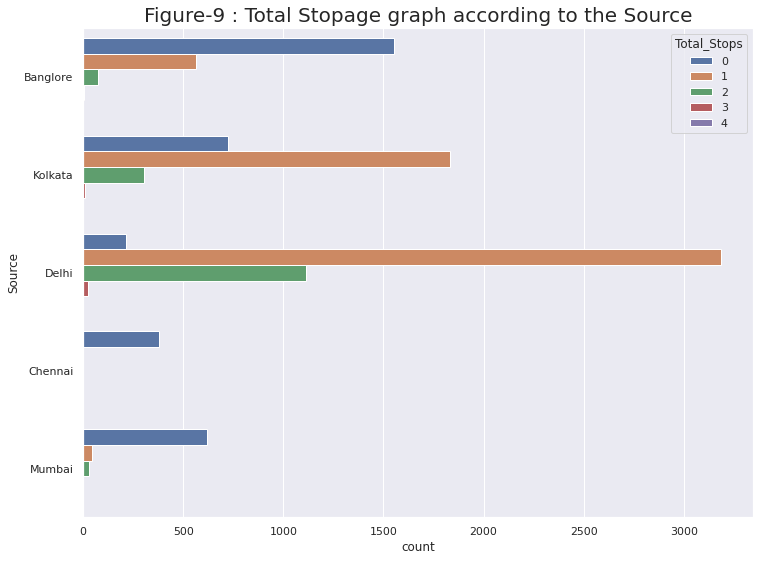

In [24]:
data.groupby(['Source','Total_Stops']).count()

plt.figure(figsize=(12,9))
sns.countplot(y='Source',data=data,hue='Total_Stops')
plt.title("Figure-9 : Total Stopage graph according to the Source", fontsize='20')

In [25]:
data[data['Source']=='Chennai']['Destination'].unique()

array(['Kolkata'], dtype=object)

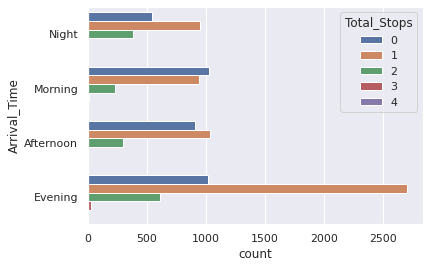

In [26]:
sns.countplot(y='Arrival_Time',data=data,hue='Total_Stops')

In [27]:
# for i in data.columns:
#   sns.boxplot(x=i, y= 'Price', data=data)
#   plt.show()

<center><p>Thanks for reading </p></center>